<a href="https://colab.research.google.com/github/asetya/BigData/blob/master/SobelFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Filtering Using Sobel Filter**

addapted from : https://github.com/nahid0335/edge-detection-using-sobel-filter

Didalam praktikum ini - filter sobel dibuat secara manual menggunakan perkalian satu satu antara filter dengan image masukan yang sudah diubah menjadi grayscale 

fUNGSI filtering ada didalam fungsi fsobel

Perhatikan untuk file lena.jpg atau file lain harus di upload dulu ke folder contents agar program ini dapat langsung dijalankan 

**Install Open CV**

In [1]:
! pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


**Fungsi Sobel**

In [32]:
def fsobel(image_gray):
  [rows, columns] = np.shape(image_gray)
  #create output image only with zero same size as input image
  sobel_filtered_image = np.zeros(shape=(rows, columns))
  #same for x derivative and y derivative
  sobel_filtered_x = np.zeros(shape=(rows, columns))
  sobel_filtered_y = np.zeros(shape=(rows, columns))

  #sobel kernel
  sobel_y = np.array([[-1, -2, -1], 
                    [0, 0, 0], 
                    [1, 2, 1]])

  sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
  
  #OPERASI KONVOLUSI MULAI DARI SINI
  for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(sobel_x, image_gray[i:i + 3, j:j + 3]))     #get x derivative
        sobel_filtered_x[i+1,j+1]=gx                                        #store x derivative
        gy = np.sum(np.multiply(sobel_y, image_gray[i:i + 3, j:j + 3]))     #get y derivative
        sobel_filtered_y[i+1,j+1]=gy                                        #store y derivative
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)     #find the megnitude
   # OPERASI KONVOLUSI SAMPAI DISINI

  #normalize / scale the image 0 to 255
  cv2.normalize(sobel_filtered_x, sobel_filtered_x, 0, 255, cv2.NORM_MINMAX)
  cv2.normalize(sobel_filtered_y, sobel_filtered_y, 0, 255, cv2.NORM_MINMAX)
  cv2.normalize(sobel_filtered_image, sobel_filtered_image, 0, 255, cv2.NORM_MINMAX)
        
  #round up and type cast to int from float
  sobel_filtered_x = np.round(sobel_filtered_x).astype(np.uint8)
  sobel_filtered_y = np.round(sobel_filtered_y).astype(np.uint8)
  sobel_filtered_image = np.round(sobel_filtered_image).astype(np.uint8)
  return(sobel_filtered_image,sobel_filtered_x,sobel_filtered_y)

**Read and Show the Original GrayScale Image**

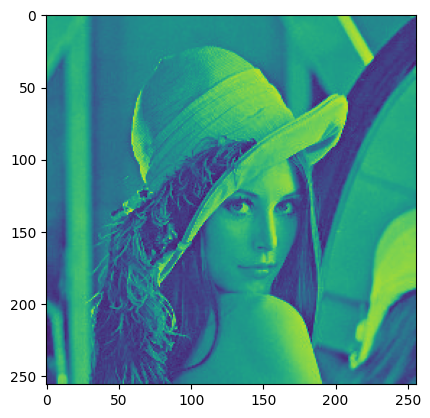

In [33]:
#import input image
image_original = cv2.imread('lena.jpg', cv2.IMREAD_COLOR)
#convert to gray color
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
#show input
plt.imshow(image_gray)


**Memanggil Fungsi Sobel**

In [34]:
s,sx,sy = fsobel(image_gray)

**Menambpilkan filter Horisontal**

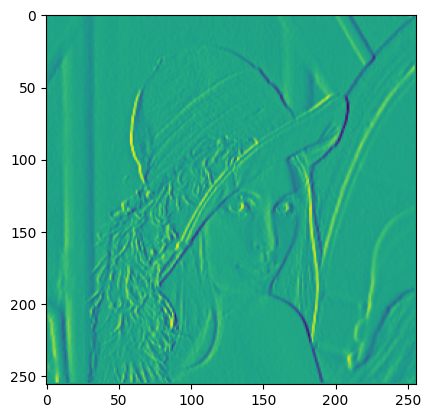

In [37]:
#output x-derivative and y-derivatiive
plt.imshow(sx)


**Menampilkan Filter Vertikal**

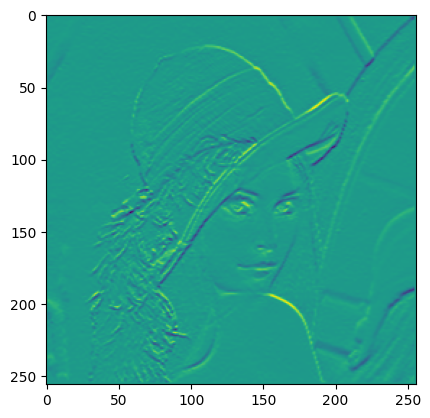

In [38]:
plt.imshow(sy)

**Shows The Combination Horizontal and Vertical **

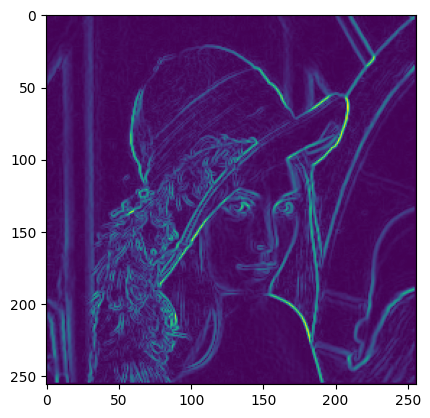

In [39]:
plt.imshow(s)

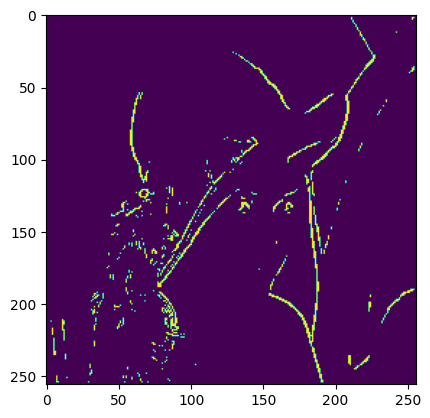

In [41]:
#use a threshold value 
ret1,th1 = cv2.threshold(s,100,255,cv2.THRESH_BINARY)
#out[ut final image]
plt.imshow(th1)